<a href="https://colab.research.google.com/github/jpisani86/finance_projects/blob/main/Berkshire_Carhart_4_risk_factors_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from statsmodels.api import OLS

In [3]:
pdr.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [4]:
start = '1926-01-01'

In [5]:
ff = pdr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq = 'M', start=start).read()

In [10]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2023-09   -5.24 -2.51  1.52  0.43
 2023-10   -3.19 -3.87  0.19  0.47
 2023-11    8.84 -0.02  1.64  0.44
 2023-12    4.85  6.34  4.93  0.43
 2024-01    0.70 -5.07 -2.39  0.47
 
 [1171 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2019   28.28  -6.14 -10.46  2.15
 2020   23.66  13.18 -46.67  0.45
 2021   23.56  -3.89  25.49  0.04
 2022  -21.60  -6.95  25.81  1.43
 2023   21.68  -3.23 -13.59  4.95
 
 [97 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [13]:
ff_df = ff[0]

In [16]:
ff_df.tail()

,Mkt-RF,SMB,HML,RF
Date,,,,
2023-09,-5.24,-2.51,1.52,0.43
2023-10,-3.19,-3.87,0.19,0.47
2023-11,8.84,-0.02,1.64,0.44
2023-12,4.85,6.34,4.93,0.43
2024-01,0.70,-5.07,-2.39,0.47


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

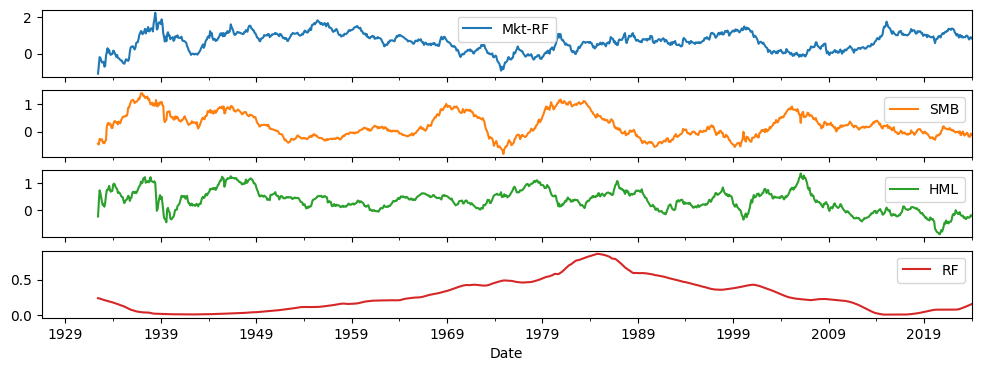

In [15]:
# subplots of data series
# amotthing the time series by taking the rolling 72 months mean
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [17]:
ff_mom_df = pdr.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq = 'M', start=start).read()[0]

array([<Axes: xlabel='Date'>], dtype=object)

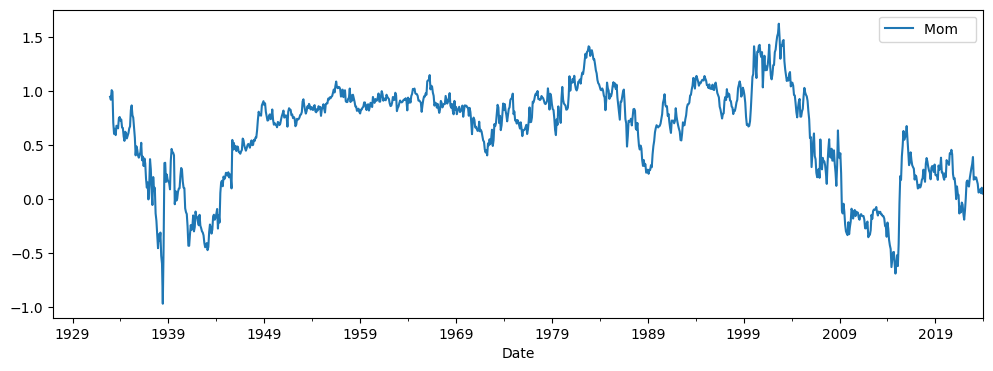

In [18]:
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [23]:
ffac_merged_df = pd.merge(ff_df, ff_mom_df, on='Date', how= 'inner',sort=True,indicator=False,validate='one_to_one')

In [24]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2023-09,-5.24,-2.51,1.52,0.43,0.26
2023-10,-3.19,-3.87,0.19,0.47,1.73
2023-11,8.84,-0.02,1.64,0.44,2.75


In [43]:
yf.pdr_override()
BRH_data = pdr.data.get_data_yahoo('BRH', start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%%**********************]  1 of 1 completed


In [44]:
BRH_data

Date
2000-01-31             NaN
2000-02-29   -1.275797e-01
2000-03-31    2.150538e-01
2000-04-30    1.628319e-01
2000-05-31   -2.587519e-02
                  ...     
2017-09-30    0.000000e+00
2017-10-31    0.000000e+00
2017-11-30    0.000000e+00
2017-12-31    2.555443e+06
2018-01-31   -9.999996e-01
Freq: M, Name: Adj Close, Length: 217, dtype: float64

In [45]:
BRH_df  = BRH_data.to_frame()

In [46]:
BRH_df

,Adj Close
Date,
2000-01-31,NaN
2000-02-29,-1.275797e-01
2000-03-31,2.150538e-01
2000-04-30,1.628319e-01
2000-05-31,-2.587519e-02
...,...
2017-09-30,0.000000e+00
2017-10-31,0.000000e+00
2017-11-30,0.000000e+00


In [51]:
BRH_df['str_date'] = BRH_df.index.astype(str)
BRH_df['dt_date'] = pd.to_datetime(BRH_df['str_date']).dt.strftime('%Y-%m')
BRH_df

,Adj Close,str_date,dt_date
Date,,,
2000-01-31,NaN,2000-01-31,2000-01
2000-02-29,-1.275797e-01,2000-02-29,2000-02
2000-03-31,2.150538e-01,2000-03-31,2000-03
2000-04-30,1.628319e-01,2000-04-30,2000-04
2000-05-31,-2.587519e-02,2000-05-31,2000-05
...,...,...,...
2017-09-30,0.000000e+00,2017-09-30,2017-09
2017-10-31,0.000000e+00,2017-10-31,2017-10
2017-11-30,0.000000e+00,2017-11-30,2017-11


In [52]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')

In [53]:
BRH_ffm_merge_df = pd.merge(BRH_df, ffac_merged_df, how='inner',on='dt_date',sort=True,copy=True,indicator=False,validate='one_to_one')

In [54]:
BRH_ffm_merge_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,2000-01-31,2000-01,-4.74,5.77,-1.88,0.41,1.92,2000-01
1,-1.275797e-01,2000-02-29,2000-02,2.45,21.36,-9.59,0.43,18.20,2000-02
2,2.150538e-01,2000-03-31,2000-03,5.20,-17.20,8.13,0.47,-6.83,2000-03
3,1.628319e-01,2000-04-30,2000-04,-6.40,-6.68,7.26,0.46,-8.39,2000-04
4,-2.587519e-02,2000-05-31,2000-05,-4.42,-6.05,4.75,0.50,-8.98,2000-05
...,...,...,...,...,...,...,...,...,...
212,0.000000e+00,2017-09-30,2017-09,2.51,4.47,3.14,0.09,-1.32,2017-09
213,0.000000e+00,2017-10-31,2017-10,2.25,-1.94,0.20,0.09,4.27,2017-10
214,0.000000e+00,2017-11-30,2017-11,3.12,-0.55,-0.03,0.08,-0.87,2017-11
215,2.555443e+06,2017-12-31,2017-12,1.06,-1.32,0.06,0.09,-1.54,2017-12


In [55]:
BRH_ffm_merge_df.drop(columns=['str_date_x', 'str_date_y'], inplace=True)

In [56]:
BRH_ffm_merge_df.rename(columns={'Adj Close': 'Berkshire Hathaway Inc'}, inplace = True)

In [58]:
BRH_ffm_merge_df['BRH_RF'] = BRH_ffm_merge_df['Berkshire Hathaway Inc']*100 - BRH_ffm_merge_df['RF']

In [62]:
BRH_ffm_merge_df.dropna(axis=0, inplace=True)

In [68]:
BRH_ffm_merge_df.rename(columns={'Mom   ': 'Mom'}, inplace = True)
results = OLS(BRH_ffm_merge_df['BRH_RF'],BRH_ffm_merge_df[['Mkt-RF', 'SMB', 'HML','Mom']], missing='drop' ).fit()

In [69]:
BRH_ffm_merge_df

,Berkshire Hathaway Inc,dt_date,Mkt-RF,SMB,HML,RF,Mom,BRH_RF
1,-1.275797e-01,2000-02,2.45,21.36,-9.59,0.43,18.20,-1.318797e+01
2,2.150538e-01,2000-03,5.20,-17.20,8.13,0.47,-6.83,2.103538e+01
3,1.628319e-01,2000-04,-6.40,-6.68,7.26,0.46,-8.39,1.582319e+01
4,-2.587519e-02,2000-05,-4.42,-6.05,4.75,0.50,-8.98,-3.087519e+00
5,-1.265625e-01,2000-06,4.64,12.84,-8.42,0.40,16.60,-1.305625e+01
...,...,...,...,...,...,...,...,...
212,0.000000e+00,2017-09,2.51,4.47,3.14,0.09,-1.32,-9.000000e-02
213,0.000000e+00,2017-10,2.25,-1.94,0.20,0.09,4.27,-9.000000e-02
214,0.000000e+00,2017-11,3.12,-0.55,-0.03,0.08,-0.87,-8.000000e-02
215,2.555443e+06,2017-12,1.06,-1.32,0.06,0.09,-1.54,2.555443e+08


In [70]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 BRH_RF   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):              0.016
Method:                 Least Squares   F-statistic:                              1.903
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                       0.111
Time:                        12:37:01   Log-Likelihood:                         -4030.2
No. Observations:                 216   AIC:                                      8068.
Df Residuals:                     212   BIC:                                      8082.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF      8.192e+05   5.48e+05      1.495      0.137   -2.61e+05     1.9e+06
SMB        -1.411e+06   6.92e+05     -2.039      0.043   -2.77e+06   -4.71e+04
HML        -8.016e+05   6.91e+05     -1.161      0.247   -2.16e+06     5.6e+05
Mom         7.714e+05   4.29e+05      1.799      0.073   -7.37e+04    1.62e+06
==============================================================================
Omnibus:                      399.442   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108113.249
Skew:                          10.161   Prob(JB):                         0.00
Kurtosis:                     110.701   Cond. No.                         2.16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
import statsmodels.tools

In [73]:
BRH_ffm_merge_df_constant = statsmodels.tools.add_constant(BRH_ffm_merge_df, prepend=True)

In [74]:
BRH_ffm_merge_df_constant

,const,Berkshire Hathaway Inc,dt_date,Mkt-RF,SMB,HML,RF,Mom,BRH_RF
1,1.0,-1.275797e-01,2000-02,2.45,21.36,-9.59,0.43,18.20,-1.318797e+01
2,1.0,2.150538e-01,2000-03,5.20,-17.20,8.13,0.47,-6.83,2.103538e+01
3,1.0,1.628319e-01,2000-04,-6.40,-6.68,7.26,0.46,-8.39,1.582319e+01
4,1.0,-2.587519e-02,2000-05,-4.42,-6.05,4.75,0.50,-8.98,-3.087519e+00
5,1.0,-1.265625e-01,2000-06,4.64,12.84,-8.42,0.40,16.60,-1.305625e+01
...,...,...,...,...,...,...,...,...,...
212,1.0,0.000000e+00,2017-09,2.51,4.47,3.14,0.09,-1.32,-9.000000e-02
213,1.0,0.000000e+00,2017-10,2.25,-1.94,0.20,0.09,4.27,-9.000000e-02
214,1.0,0.000000e+00,2017-11,3.12,-0.55,-0.03,0.08,-0.87,-8.000000e-02
215,1.0,2.555443e+06,2017-12,1.06,-1.32,0.06,0.09,-1.54,2.555443e+08


In [77]:
results = OLS(BRH_ffm_merge_df_constant['BRH_RF'],BRH_ffm_merge_df_constant[['const','Mkt-RF', 'SMB', 'HML','Mom']], missing='drop' ).fit()

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BRH_RF   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.950
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.103
Time:                        12:48:07   Log-Likelihood:                -4029.1
No. Observations:                 216   AIC:                             8068.
Df Residuals:                     211   BIC:                             8085.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.114e+06   2.14e+06      1.454      0.148   -1.11e+06    7.34e+06
Mkt-RF      7.213e+05   5.51e+05      1.309      0.192   -3.65e+05    1.81e+06
SMB        -1.461e+06   6.91e+05     -2.116      0.036   -2.82e+06   -9.96e+04
HML        -9.395e+05   6.95e+05     -1.351      0.178   -2.31e+06    4.31e+05
Mom         7.142e+05   4.29e+05      1.663      0.098   -1.32e+05    1.56e+06
==============================================================================
Omnibus:                      399.223   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107824.432
Skew:                          10.151   Prob(JB):                         0.00
Kurtosis:                     110.556   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""